### Cargo los datos: 

Ya están unificados y obtenido una variable para el caso de 'goodbad'

- unificado: significa que en los datos originales había variables con {1,2} dónde 1 significaba 'sí' y 2 'no' y otras con {0,1} donde el 0 es 'no' y el 1 'sí'. Ahora está codificado todo con {0,1} dónde el 0 significa 'no' y el 1 'sí'
- 'goodbad': esta variable categoriza cada instancia en si ha sido buena o mala en función de los días de estancia que haya pasado ingresado el paciente después de la operación. Si es <8 es buena (1) si es mayor o igual es mala (0)
- tipo/tipoNum: estas variables significan si ha habido reconstrucción 3D para la operación {con, 1} o si  no la ha habido {sin, 0}

In [1]:
import pandas as pd
df = pd.read_csv('rawdata_unificado_goodbad.csv', sep=';', encoding='latin-1')

In [2]:
df.shape

(117, 37)

In [3]:
df=df.drop(columns=["NH"])

Mezclar los datos para que no estén los de 'con' reconstrucción todos seguidos y luego los de 'sin'

In [4]:
from sklearn.utils import shuffle
dfShuffle = shuffle(df,random_state=1)

Separar los datos que son susceptibles de ser predecibles, de los demás

In [5]:
dfY = pd.DataFrame()
dfY=dfShuffle[["Tipo","TipoNum","Dias de estancia","EXITUS","goodbad"]].copy()
dfX=dfShuffle.drop(columns=["Tipo","TipoNum","Dias de estancia","EXITUS","goodbad"])
dfX

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,...,trasfusion U,adyuvancia U,TIPO HISTOLOGICO,GRADO HISTOLOGICO,N_GANGLIOS RES,EXTENSION (T),ilv U,ipn U,budding U,AJCC
69,63,2,0,2,2,0,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
46,82,1,0,3,3,1,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,1.0,NaN,5.0
58,31,1,0,1,2,0,0,2,1,0,...,0,1,2.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
114,86,2,0,1,2,0,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,NaN,5.0
73,67,1,1,2,2,1,0,2,0,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,59,2,0,1,2,0,0,1,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
72,66,1,0,2,3,1,1,2,1,0,...,0,1,2.0,2.0,2.0,3.0,1.0,1.0,0.0,5.0
12,64,1,0,3,1,0,0,2,0,0,...,0,1,1.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0
107,82,1,0,2,3,1,1,2,1,0,...,0,0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0


### Probamos sólo con las variables que hay 'a priori'

#### Variables que no son 'a priori'

se eliminan de los datos 'a priori':
- la 'cirugía' por poder variar en el transcurso de la operación
- la 'albumina U' por que hay 25 instancias que no tienen este dato (missing values)
- la 'cea U'por que hay 12 instancias que no tienen este dato (missing values) (no coinciden todas las instancias con las que no tienen el dato de la 'albumina U')

In [6]:
dfPriori=dfX.copy()

In [7]:
dfPriori=dfPriori.drop(columns=["cea U","albumina U","CIRUGIA","TiempoCx","Nº trocar","conversion U","complicaciones intraop U","descenso ang U","complicaciones U","trasfusion U","adyuvancia U","TIPO HISTOLOGICO","GRADO HISTOLOGICO","N_GANGLIOS RES","EXTENSION (T)","ilv U","ipn U","budding U","AJCC"])

In [8]:
dfPriori

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,neoadyuvancia U,LOCALIZACION
69,63,2,0,2,2,0,0,2,1,0,0,1
46,82,1,0,3,3,1,0,2,1,0,0,3
58,31,1,0,1,2,0,0,2,1,0,0,2
114,86,2,0,1,2,0,0,2,1,0,0,1
73,67,1,1,2,2,1,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9,59,2,0,1,2,0,0,1,1,0,0,1
72,66,1,0,2,3,1,1,2,1,0,0,1
12,64,1,0,3,1,0,0,2,0,0,0,4
107,82,1,0,2,3,1,1,2,1,0,0,4


In [9]:
dfY

,Tipo,TipoNum,Dias de estancia,EXITUS,goodbad
69,sin,0,6,0.0,1
46,con,1,7,0.0,1
58,sin,0,17,0.0,0
114,sin,0,9,0.0,0
73,sin,0,11,0.0,0
...,...,...,...,...,...
9,con,1,5,0.0,1
72,sin,0,10,0.0,0
12,con,1,8,0.0,0
107,sin,0,7,0.0,1


In [10]:
dfPriori.columns

Index(['EDAD', 'SEXO', 'diabetes U', 'TABAQUISMO', 'ASA', 'vasculopatía U',
       'imc U', 'LEUCOCITOS', 'hemoglobina U', 'creatinina U',
       'neoadyuvancia U', 'LOCALIZACION'],
      dtype='object')

Normalización de los datos de tipo continuo

In [11]:
from sklearn import preprocessing
dfPriori_norm = dfPriori.copy()
scaler = preprocessing.MinMaxScaler() #normalize the age
dfPriori_norm[['EDAD']] = scaler.fit_transform(dfPriori_norm[['EDAD']])

Comprobamos que no hay valores NaN:

In [12]:
for i in range(12):
    col = dfPriori_norm.columns[i]
    count = dfPriori_norm[col].isna().sum()
    print(dfPriori_norm[col].name,count)

EDAD 0
SEXO 0
diabetes U 0
TABAQUISMO 0
ASA 0
vasculopatía U 0
imc U 0
LEUCOCITOS 0
hemoglobina U 0
creatinina U 0
neoadyuvancia U 0
LOCALIZACION 0


In [13]:
name_col=dfPriori.columns

Partir los datos en conjunto de entrenamiento y conjunto de test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfPriori, dfY, test_size=0.10, random_state=42)

In [15]:
print(len(X_train))
print(len(X_test))

105
12


In [16]:
y_train_gb= pd.DataFrame()
y_train_gb=y_train[["goodbad"]].copy()
y_test_gb= pd.DataFrame()
y_test_gb=y_test[["goodbad"]].copy()

In [17]:
ind = X_train.index #extraer el orden de los índices

### 1.1 Clustering

In [18]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, init='Cao')
clusters = kproto.fit_predict(X_train, categorical=[1,2,3,4,5,6,7,8,9,10,11])

Unir los datos de las etiquetas de los clusteres con el dataset completo

In [19]:
labels = pd.DataFrame(clusters, index=ind)
training_set=pd.concat((X_train,y_train),axis=1)
training_set

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,neoadyuvancia U,LOCALIZACION,Tipo,TipoNum,Dias de estancia,EXITUS,goodbad
29,73,2,0,2,3,1,1,2,0,0,0,3,con,1,9,0.0,0
71,66,2,0,1,1,0,0,2,0,0,0,2,sin,0,15,0.0,0
66,59,2,0,1,2,0,0,2,1,0,1,5,sin,0,8,0.0,0
69,63,2,0,2,2,0,0,2,1,0,0,1,sin,0,6,0.0,1
115,86,2,0,1,2,0,0,2,1,0,0,1,sin,0,9,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,45,2,0,1,1,0,0,2,0,0,0,7,con,1,7,0.0,1
110,84,1,1,1,3,1,0,2,1,1,0,1,sin,0,5,0.0,1
68,61,1,1,2,3,1,1,2,0,0,1,5,sin,0,15,0.0,0
23,71,2,0,1,2,0,0,2,0,0,0,1,con,1,6,0.0,1


In [20]:
labeled_training = pd.concat([training_set,labels],axis=1)
labeled_training = labeled_training.rename({0:'labels'},axis=1)
labeled_training

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,neoadyuvancia U,LOCALIZACION,Tipo,TipoNum,Dias de estancia,EXITUS,goodbad,labels
29,73,2,0,2,3,1,1,2,0,0,0,3,con,1,9,0.0,0,1
71,66,2,0,1,1,0,0,2,0,0,0,2,sin,0,15,0.0,0,0
66,59,2,0,1,2,0,0,2,1,0,1,5,sin,0,8,0.0,0,0
69,63,2,0,2,2,0,0,2,1,0,0,1,sin,0,6,0.0,1,0
115,86,2,0,1,2,0,0,2,1,0,0,1,sin,0,9,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,45,2,0,1,1,0,0,2,0,0,0,7,con,1,7,0.0,1,0
110,84,1,1,1,3,1,0,2,1,1,0,1,sin,0,5,0.0,1,1
68,61,1,1,2,3,1,1,2,0,0,1,5,sin,0,15,0.0,0,0
23,71,2,0,1,2,0,0,2,0,0,0,1,con,1,6,0.0,1,1


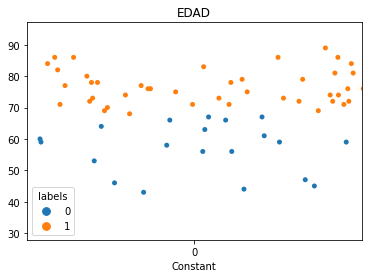

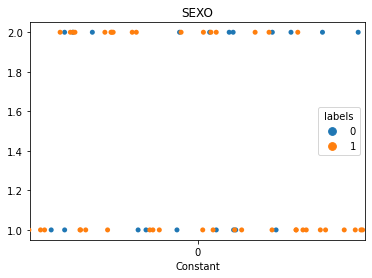

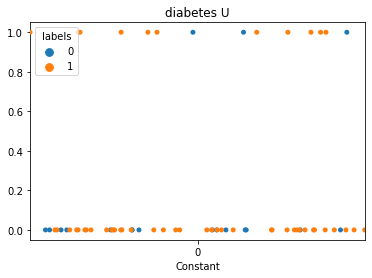

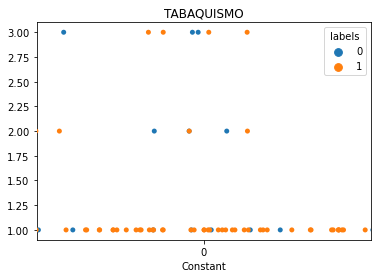

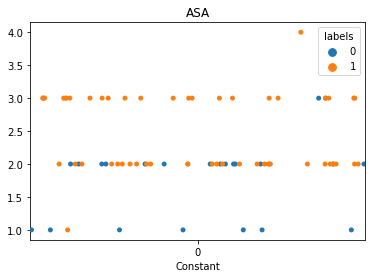

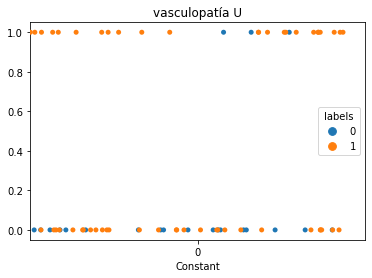

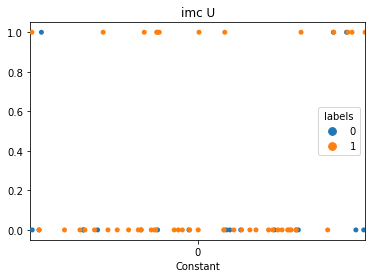

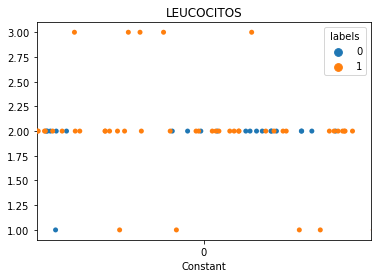

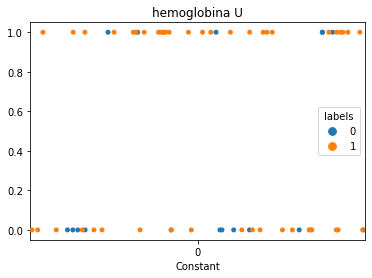

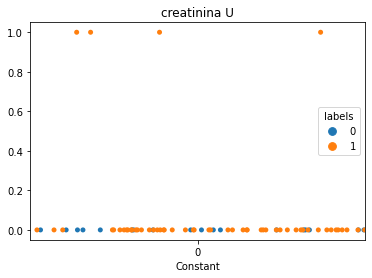

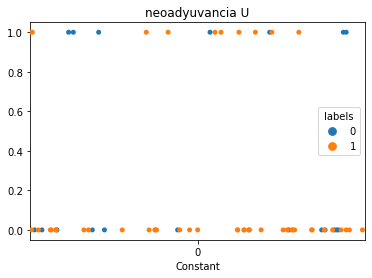

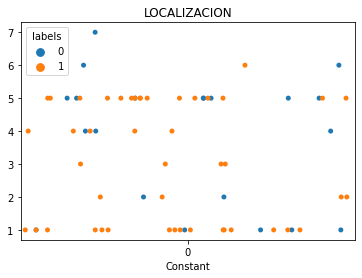

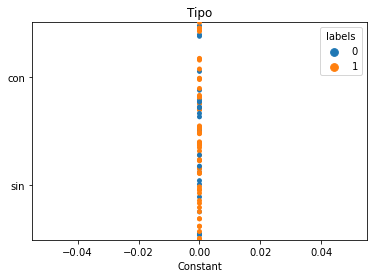

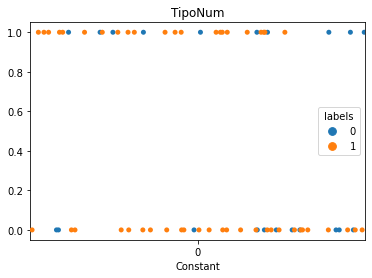

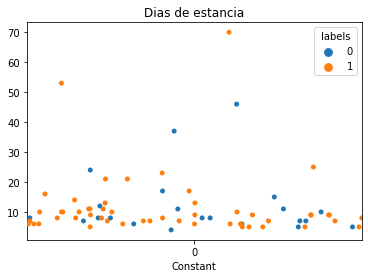

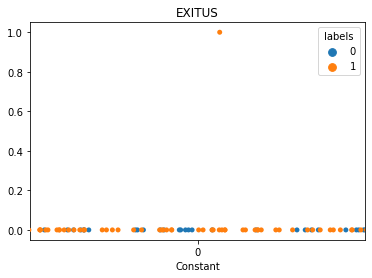

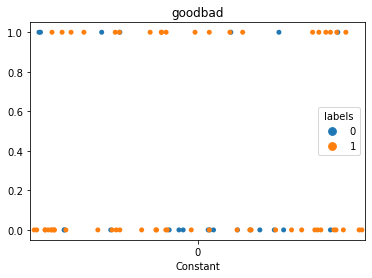

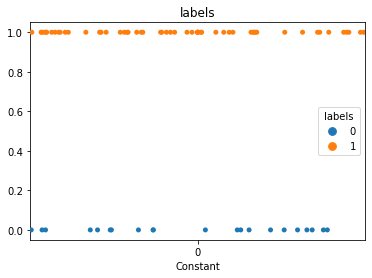

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

labeled_training['Constant'] = 0 #dummy feature for plotting

for i in range(18):
    col = labeled_training.columns[i]
    ax = sns.stripplot(x=labeled_training['Constant'], y=labeled_training[col].values,hue=labeled_training['labels'],dodge=True,jitter=1.5)
    ax.set_title(col)
    plt.show()

### 1.2 Clasificación 'goodbad'

In [22]:
for i in range(1): #comprobar que no hay NaN
    col = y_train_gb.columns[i]
    count = y_train_gb[col].isna().sum()
    print(y_train_gb[col].name,count)

goodbad 0


In [47]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### k-NN

In [24]:
import numpy as np

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, np.ravel(y_train_gb))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train_gb)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test_gb)))



Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.50


#### Logistic Regression

Se cambia el método dentro de LogisticRegression con respecto a todos los datos 'lbfgs' por 'liblinear' ya que el primero no alcanza convergencia.

In [26]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, np.ravel(y_train_gb))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train_gb)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(lr.score(X_test, y_test_gb)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.50


#### Comparación con varios modelos: 10-cross validation

In [52]:
# prepare models
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SGD', SGDClassifier(loss="hinge", penalty="l2", max_iter=100)))
models.append(('DTree', DecisionTreeClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100)))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('NN',MLPClassifier(random_state=1, max_iter=300)))
models.append(('RF',RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)))
models.append(('GBC',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)))

kNN: 0.620000 (0.152326)
SVM: 0.620000 (0.126085)
SGD: 0.494545 (0.187687)
DTree: 0.590909 (0.147262)
AdaBoost: 0.590000 (0.170631)
LR: 0.609091 (0.109771)


C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

NN: 0.561818 (0.137197)
RF: 0.611818 (0.105552)
ETC: 0.572727 (0.118531)
GBC: 0.610000 (0.150011)


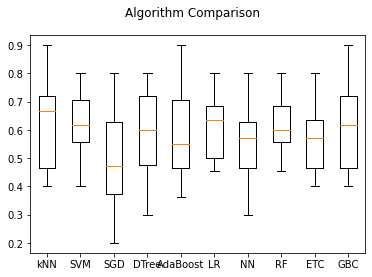

In [53]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train,np.ravel(y_train_gb), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [30]:
# feature selection CHI2
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, np.ravel(y_train_gb))
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 1.090828
Feature 1: 0.005616
Feature 2: 0.012274
Feature 3: 0.350553
Feature 4: 0.032570
Feature 5: 0.142586
Feature 6: 1.016701
Feature 7: 0.020621
Feature 8: 0.011689
Feature 9: 0.021210
Feature 10: 0.329946
Feature 11: 8.567853


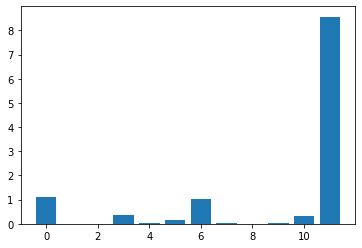

In [31]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, np.ravel(y_train_gb), X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Conocer el orden de las features, el número es el índice de la feature

In [32]:
np.argsort(fs.scores_)

array([ 1,  8,  2,  7,  9,  4,  5, 10,  3,  6,  0, 11], dtype=int64)

In [33]:
name_col_X=X_train.columns
print(name_col_X)

Index(['EDAD', 'SEXO', 'diabetes U', 'TABAQUISMO', 'ASA', 'vasculopatía U',
       'imc U', 'LEUCOCITOS', 'hemoglobina U', 'creatinina U',
       'neoadyuvancia U', 'LOCALIZACION'],
      dtype='object')


In [34]:
# feature selection MUTUAL INFO CLASSIF
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train_gb)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.005767
Feature 1: 0.011843
Feature 2: 0.030216
Feature 3: 0.026618
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.052154
Feature 10: 0.000000
Feature 11: 0.137085


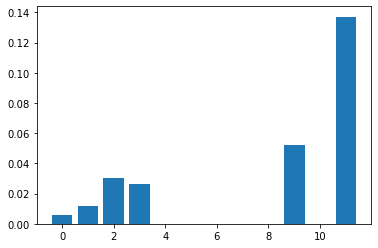

In [35]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, np.ravel(y_train_gb), X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [36]:
np.argsort(fs.scores_)

array([ 4,  5,  6,  7,  8, 10,  0,  1,  3,  2,  9, 11], dtype=int64)

#### Model built using all features

In [37]:
from sklearn.metrics import accuracy_score

Con todas las características se obtiene:

In [38]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, np.ravel(y_train_gb))
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 50.00


##### Select n-features

Cogemos las 3 características más relevantes de Chi2. De las 5 características sólo 1 es del preoperatorio:

1.- Localización

2.- Edad

3.- imc U

In [39]:
# feature selection
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=chi2, k=3)
    fs.fit(X_train, y_train_gb)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [40]:
X_train_fs, X_test_fs = select_features(X_train, np.ravel(y_train_gb), X_test)

kNN: 0.638182 (0.163626)
SVM: 0.592727 (0.133038)
SGD: 0.583636 (0.168111)
DTree: 0.620909 (0.179579)
AdaBoost: 0.630909 (0.200956)
LR: 0.661818 (0.173529)


C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


NN: 0.621818 (0.127091)
RF: 0.610909 (0.135439)
ETC: 0.571818 (0.114809)
GBC: 0.630000 (0.179763)


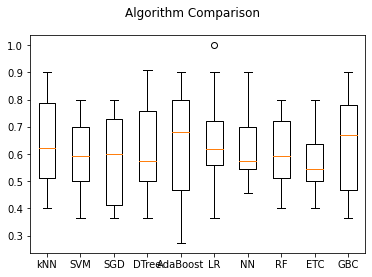

In [54]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_fs,np.ravel(y_train_gb), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Test con los dos modelos: AdaBoost y LogisticRegression

In [42]:
# fit the model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train_fs, np.ravel(y_train_gb))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.33


In [43]:
print(model.feature_importances_)

[0.93 0.02 0.05]


Feature: 0, Score: 0.93000
Feature: 1, Score: 0.02000
Feature: 2, Score: 0.05000


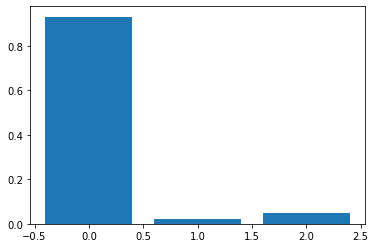

In [44]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_gb, yhat)

array([[5, 1],
       [1, 5]], dtype=int64)

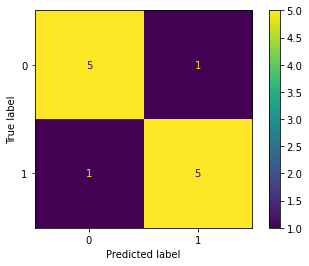

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_fs, y_test_gb)  
plt.show()  

In [55]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, np.ravel(y_train_gb))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 50.00


Feature: 0, Score: -0.02973
Feature: 1, Score: -0.34355
Feature: 2, Score: -0.36030


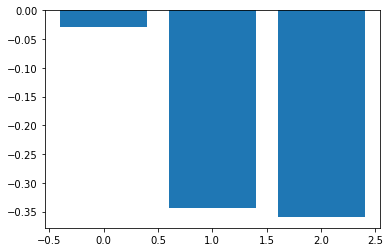

In [59]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_gb, yhat)

array([[4, 2],
       [4, 2]], dtype=int64)

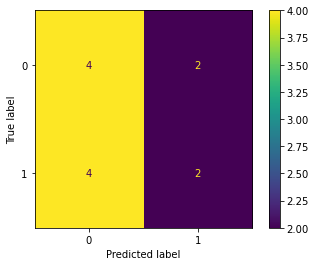

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_fs, y_test_gb)  
plt.show()  

#### Conclusiones:

1-  Los modelos entrenados con todas las características de las que se dispone a priori (con sus parámetros por "defecto") no dan unos valores de accuracy después de una k-cross validation altos, rondan el 60%, yegando a bajar en algún caso por debajo del 50%

2-  Se han hecho dos estudios de características, por Chi2 y "mutual information". Para el primer estudio se ve claramente que la feature que más relevancia tiene es la de "localización" del tumor

3-  El clustering parece que tiene en cuenta la edad